In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
X = np.random.rand(100, 1) * 6-3 
y = 0.5* X**2 + 1.5 * X + 2+ np.random.randn(100, 1) 

In [37]:
X

array([[ 0.82879674],
       [-0.35284716],
       [ 1.80865138],
       [ 0.66273345],
       [ 1.1266372 ],
       [ 0.87082089],
       [ 2.46294517],
       [-1.86958673],
       [-1.07026408],
       [-0.31863508],
       [ 2.87901642],
       [-2.92162449],
       [ 0.64838687],
       [-2.51304243],
       [ 0.73715464],
       [ 0.81104729],
       [-1.79244675],
       [-1.60888259],
       [ 0.19577826],
       [-2.58480787],
       [-0.31091523],
       [ 0.31545666],
       [ 1.64453011],
       [ 1.80386154],
       [-0.63340167],
       [ 1.35838237],
       [ 1.57375619],
       [-0.04894727],
       [-1.36779521],
       [ 1.9251872 ],
       [ 2.17187149],
       [ 2.52804094],
       [-1.22221073],
       [-0.67680111],
       [ 1.39040879],
       [ 2.49561406],
       [-0.83810157],
       [ 1.78086726],
       [-1.74244349],
       [-0.84408088],
       [ 0.04959032],
       [ 1.23344155],
       [ 2.1582263 ],
       [ 0.74403698],
       [ 2.0702095 ],
       [-0

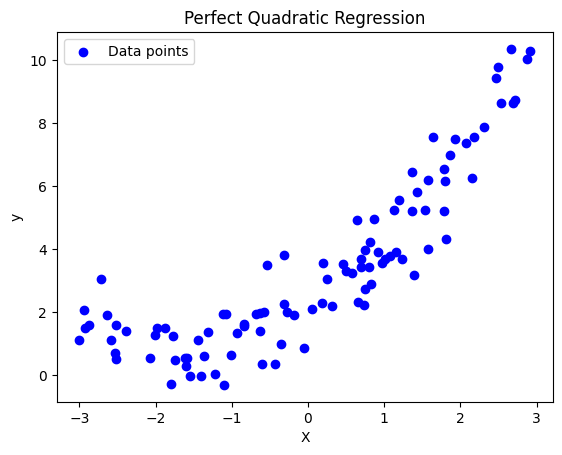

In [38]:
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Perfect Quadratic Regression')
plt.legend()
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=False,test_size=0.25)

In [40]:
X_train

array([[ 0.82879674],
       [-0.35284716],
       [ 1.80865138],
       [ 0.66273345],
       [ 1.1266372 ],
       [ 0.87082089],
       [ 2.46294517],
       [-1.86958673],
       [-1.07026408],
       [-0.31863508],
       [ 2.87901642],
       [-2.92162449],
       [ 0.64838687],
       [-2.51304243],
       [ 0.73715464],
       [ 0.81104729],
       [-1.79244675],
       [-1.60888259],
       [ 0.19577826],
       [-2.58480787],
       [-0.31091523],
       [ 0.31545666],
       [ 1.64453011],
       [ 1.80386154],
       [-0.63340167],
       [ 1.35838237],
       [ 1.57375619],
       [-0.04894727],
       [-1.36779521],
       [ 1.9251872 ],
       [ 2.17187149],
       [ 2.52804094],
       [-1.22221073],
       [-0.67680111],
       [ 1.39040879],
       [ 2.49561406],
       [-0.83810157],
       [ 1.78086726],
       [-1.74244349],
       [-0.84408088],
       [ 0.04959032],
       [ 1.23344155],
       [ 2.1582263 ],
       [ 0.74403698],
       [ 2.0702095 ],
       [-0

In [41]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()


In [42]:
regression.fit(X_train,y_train)

LinearRegression()

In [43]:
print("Coefficient is :: ",regression.coef_)
print("Intercept  is :: ",regression.intercept_)

Coefficient is ::  [[1.36165874]]
Intercept  is ::  [3.32595395]


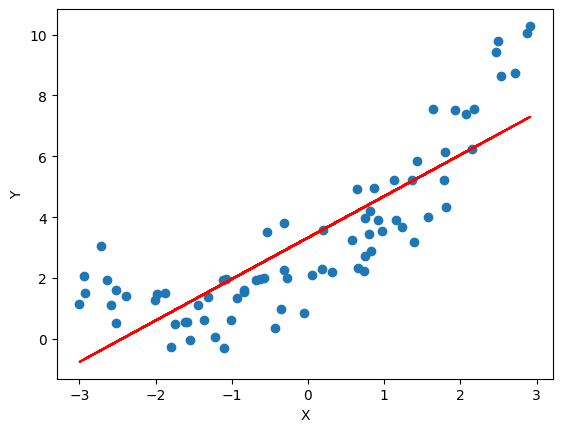

In [44]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [45]:
y_pred=regression.predict(X_test)

In [46]:
## R squared 

from sklearn.metrics import r2_score

score =r2_score(y_test,y_pred)
print(score)


0.7985692780569054


In [47]:
## Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3,include_bias=True)

In [48]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [49]:
X_train_poly

array([[ 1.00000000e+00,  8.28796737e-01,  6.86904031e-01,
         5.69303819e-01],
       [ 1.00000000e+00, -3.52847160e-01,  1.24501118e-01,
        -4.39298661e-02],
       [ 1.00000000e+00,  1.80865138e+00,  3.27121981e+00,
         5.91649623e+00],
       [ 1.00000000e+00,  6.62733453e-01,  4.39215629e-01,
         2.91082890e-01],
       [ 1.00000000e+00,  1.12663720e+00,  1.26931138e+00,
         1.43005341e+00],
       [ 1.00000000e+00,  8.70820891e-01,  7.58329024e-01,
         6.60368756e-01],
       [ 1.00000000e+00,  2.46294517e+00,  6.06609890e+00,
         1.49404690e+01],
       [ 1.00000000e+00, -1.86958673e+00,  3.49535452e+00,
        -6.53486842e+00],
       [ 1.00000000e+00, -1.07026408e+00,  1.14546519e+00,
        -1.22595025e+00],
       [ 1.00000000e+00, -3.18635077e-01,  1.01528312e-01,
        -3.23504816e-02],
       [ 1.00000000e+00,  2.87901642e+00,  8.28873554e+00,
         2.38634057e+01],
       [ 1.00000000e+00, -2.92162449e+00,  8.53588963e+00,
      

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly) 



score =r2_score(y_test,y_pred)
print(score)


0.9424603528772955


In [51]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.3899381  0.44823167 0.00925208]]
[2.14137057]


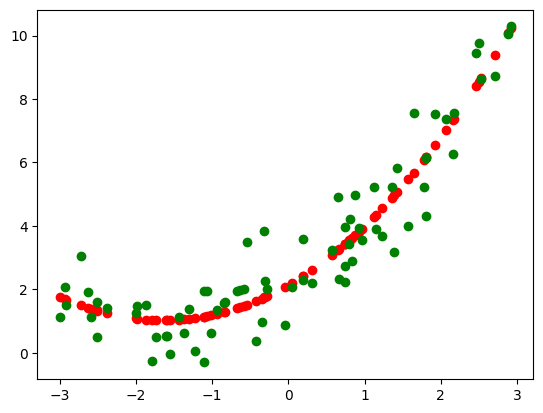

In [52]:
plt.scatter(X_train,regression.predict(X_train_poly),color='red')
plt.scatter(X_train,y_train,color='green')

In [53]:
X_new =np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)


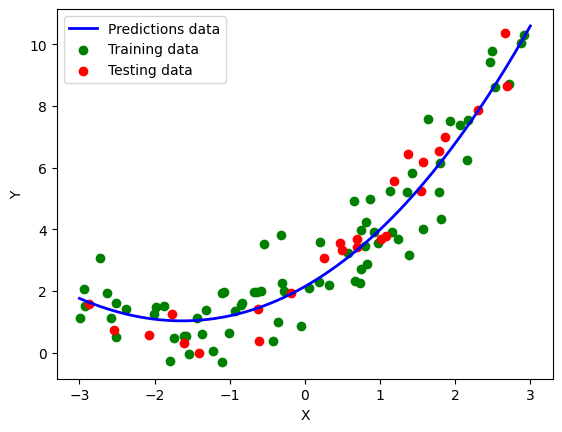

In [54]:
y_new=regression.predict(X_new_poly)
plt.plot(X_new,y_new,color='blue',linewidth=2,label='Predictions data')
plt.scatter(X_train,y_train,color='green',label='Training data')
plt.scatter(X_test,y_test,color='red',label='Testing data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Pipeline in polynomial regeression

In [55]:
from sklearn.pipeline import Pipeline

In [65]:
def poly_regression(degree):
    X_new =np.linspace(-3,3,200).reshape(200,1)
    X_new_poly=poly.transform(X_new)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    line_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("line_reg",line_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred=poly_regression.predict(X_new)

    ## Plotting
    plt.plot(X_new,y_pred,label='Predictions data'+str(degree),linewidth=2)
    plt.scatter(X_train,y_train,color='green',label='Training data'+str(degree),marker='o')
    plt.scatter(X_test,y_test,color='red',label='Testing data'+str(degree),marker='x')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polynomial Regression')
    plt.axis([-4,4,0,10])
    plt.legend(loc='upper left')
    plt.show()

    



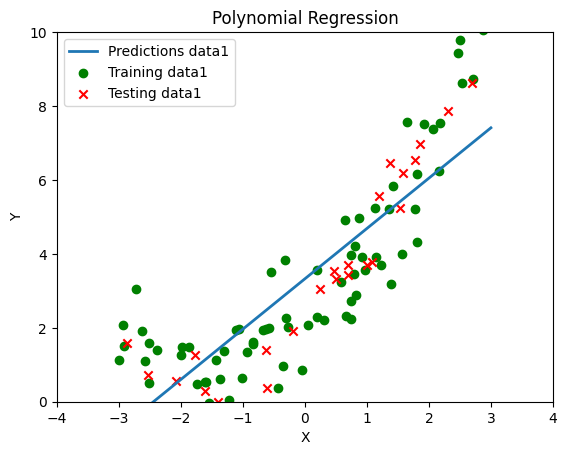

In [66]:
poly_regression(1) ## degree 1 as linear regression

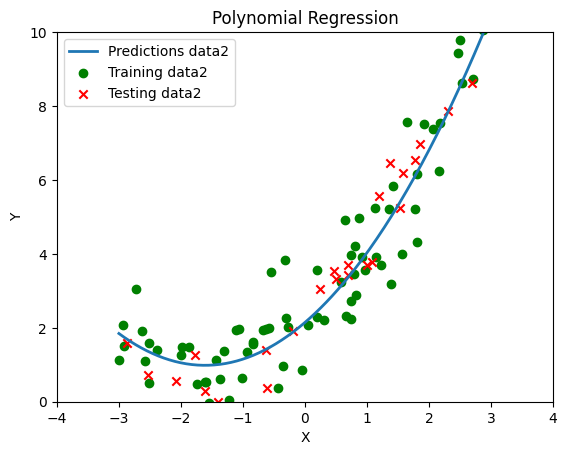

In [67]:
poly_regression(2)

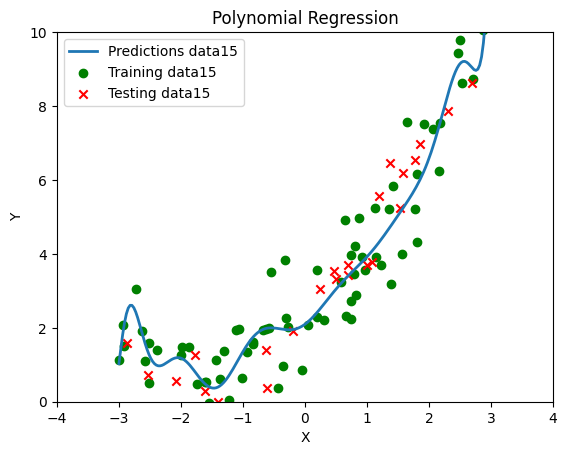

In [68]:
## Overfitting condition

poly_regression(15)